In [28]:
# Problem 2
# Starting here is the notebook used for running

import numpy as np
import pandas as pd
import os as os
import glob as glob
import csv as csv

import matplotlib.pyplot as plt

In [29]:
# Reused code written in Problem 1

def non_negative_matrix_factorization(X, W, H, R = 25, steps=100000, t=0.000001):
    
    # M: X in P2
    # U: W in P2
    # V: H in P2
    # R: Feature dimensions
    # steps: Iterations
    # t: Learning rate
    
    
    # Create object function list
    L_list = []
    
    isConverged = False
    L_prev = 1919810
    abc = True
    
    for step in range(steps):
        
        if(step % 10000 == 0 and isConverged == False):
            print(step+1)
        
        if(isConverged == False):
            
            # Projected Gradient Method
            
            # Avoid repetitive cal
            WH_X = np.matmul(W, H) - X
            
            W = NMF_projection(W - t * (np.matmul(WH_X,H.T)))
            
            WH_X = np.matmul(W, H) - X
            
            H = NMF_projection(H - t * (np.matmul(W.T,WH_X)))
            
            L = 0.5 * (np.linalg.norm( np.matmul(W,H)-X )**2)
            
            if(abc == True):   #abs((L-L_prev)/L) > 0.00001
                L_prev = L
                L_list.append(L_prev)
            else:
                isConverged = True
                
                print("Steps",step,L,L_prev,abs((L-L_prev)/L))
                
                L_prev = L
                L_list.append(L_prev)
            #Endif
            
        else:
            L_list.append(L_prev)
    
    #Endfor

    return W, H, L_list

In [30]:
def NMF_projection(M):
    
    projected = np.zeros([len(M), len(M[0])], dtype=float)
    
    for i in range(len(M)):
        for j in range(len(M[i])):
            projected[i][j] = max(0,M[i][j])
    #Endfor
    
    return projected

In [31]:
# Runtime starts here

# Init 
n_1 = int(6)
n_2 = int(4)
R = 25

L_list = []
X_predicted_list = []
W_list = []
H_list = []

In [32]:
X = [

     [-5,3,0,1],

     [-4,0,0,-1],

     [-1,-1,0,-5],

     [-1,0,0,-4],

     [0,-1,-5,-4],
    
     [-2,-1,-3,0],

    ]

X = np.array(X)

In [33]:
# Runtime function
for codeRun in range(0,1):
    
    W = np.random.uniform(1,2,size=(n_1,R))
    H = np.random.uniform(1,2,size=(R,n_2))
    
    rtnW, rtnH, L_temp = non_negative_matrix_factorization(X, W, H, R)
    
    L_list.append(L_temp)
    X_predicted_list.append(np.matmul(rtnW, rtnH))
    W_list.append(rtnW)
    H_list.append(rtnH)

1
10001
20001
30001
40001
50001
60001
70001
80001
90001


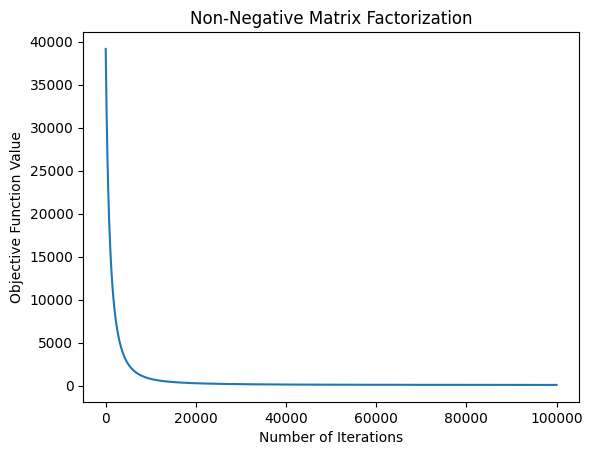

In [34]:
# Plot
plt.plot(L_list[0])
    
plt.title("Non-Negative Matrix Factorization")
plt.xlabel("Number of Iterations")
plt.ylabel("Objective Function Value")
#plt.xscale("log")
#plt.yscale("log")
plt.show()

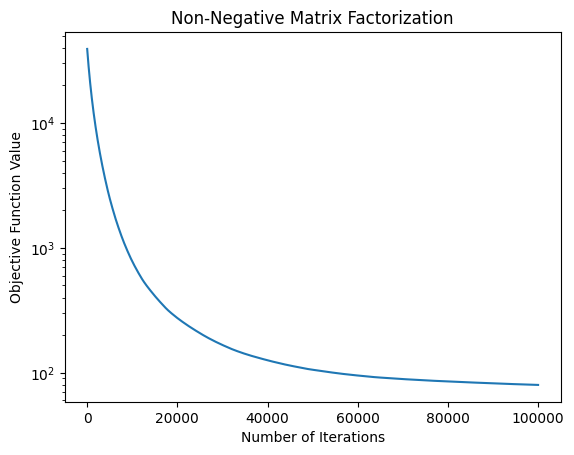

In [35]:
# Plot
plt.plot(L_list[0])
    
plt.title("Non-Negative Matrix Factorization")
plt.xlabel("Number of Iterations")
plt.ylabel("Objective Function Value")
plt.yscale("log")
plt.show()

In [36]:
W_Matrix = np.array(W_list[0])

In [37]:
# Normalize

W_matrix = W_Matrix/W_Matrix.sum(axis=0,keepdims=1)
W_matrix.sum(0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

In [38]:
print(X_predicted_list[0])

[[0.10900087 1.47905252 0.94349087 0.98710071]
 [0.2030552  0.47379246 0.1821492  0.31897395]
 [0.33926121 0.63301056 0.36087395 0.        ]
 [0.33899657 0.51128674 0.44022406 0.08666748]
 [0.02282695 0.38018401 0.05166519 0.10307953]
 [0.04403684 0.64629599 0.28527143 0.37000241]]


In [25]:
# Init dataframe
word_indicies = list(range(len(W_matrix)))
word_names = []

f = open("Prob2_nyt_vocab.dat","r")

for line in f:
    word_names.append(line.strip())
#Endfor

tbl_p2 = pd.DataFrame({"Word Index":word_indicies,"Word":word_names})
print(tbl_p2)

ValueError: All arrays must be of the same length

In [20]:
W_table = W_matrix.T
print(W_table[0])

[0.         0.         0.         ... 0.00052022 0.00033686 0.        ]


In [21]:
for i in range(len(W_matrix[0])):
    temp = W_table[i]
    tbl_p2[str(i+1)] = temp

In [22]:
# Output words
for i in range(len(W_matrix[0])):
    df_temp = tbl_p2.sort_values(str(i+1),ascending=False)
    df_temp2 = df_temp[0:10][['Word', str(i+1)]]             #10 cloeset
    print(df_temp2)
    df_temp2.to_csv('existing.csv', mode='a', index=True)

         Word         1
43        old  0.022574
23      place  0.016814
22     report  0.014583
67     police  0.014359
177    friend  0.011115
108    remain  0.010684
4    official  0.010519
64     number  0.010306
190    attack  0.009692
205       bad  0.009367
      Word         2
51    turn  0.027847
26   start  0.025231
6      man  0.023907
183   hard  0.016040
143   sign  0.011567
3     play  0.010998
61    keep  0.009773
261  carry  0.009581
40     win  0.009479
207   rule  0.008782
          Word         3
4     official  0.024331
1      percent  0.017543
71       small  0.016618
142     result  0.015182
86        cost  0.014051
33   president  0.013115
14       point  0.012110
8         plan  0.011756
47       price  0.011644
98        fall  0.011553
          Word         4
35   yesterday  0.020933
44      family  0.019337
111       base  0.016195
34      market  0.013827
94        hour  0.013825
401    despite  0.013610
160      raise  0.012044
426       sure  0.011834
41   

In [80]:
# Export and convert file externally
cwd = os.getcwd()
df = pd.read_csv(cwd + "\\existing.csv", header=None)